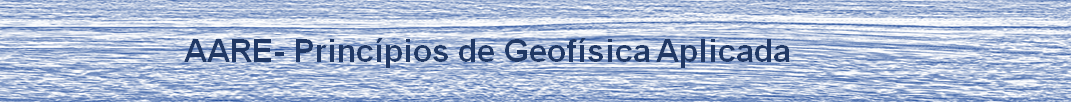

# Parte 2: Trabalho final - AVO e substituição de fluido

Alunos: Débora Motta e Victor Barony

O trabalho consiste em calcular a resposta de AVO de um reservatório, através de modelo composto por 3 camadas, com a camada intermediária representando o reservatório posicionado entre duas camadas de folhelho (topo e base). O trabalho se desenvolverá com base em dois artigos tutoriais com código, respectivamente cobrindo os assuntos de modelagem de avo e substituição de fluido, que foram passados como material para leitura. As referência completa para os artigos são:

1. Hamlyn, W., 2014, Thin beds, tuning, and AVO. The Leading Edge 33, pp 1394-1396. https://doi.org/10.1190/tle33121394.1

2. Kumar, D., 2006. A tutorial on Gassmann fluid substitution: formulation, algorithm and Matlab code. Geohorizons, v 11, pp 4-12.


## Modelagem de AVO

Durante o curso vimos que uma forma conveniente de estudar o fenomeno de propagação de ondas é através da sua solução para o caso de ondas planas que se propagam em meio homogêneo e isotrópico. Quando uma onda plana encontra uma interface separando dois meios desse tipo, torna-se necessário estabelecer o balanço correto da partição da energia da onda.   Nesse caso, a solução ficou conhecida como as Equações de Knott-Zoeppritz que fornecem analiticamente os coeficientes de reflexão e transmissão das respectivas componentes, em cada modo de propagação.

A conceito de AVO ou AVA (amplitude versus offset ou ângulo) surgiu da observação que qualquer um dos coefientes de reflexão varia com o ângulo de incidência na interface separando os dois meios. Tal variação é dependente das propriedades elasticas dos meios acima e abaixo da interface, constituindo portanto uma ferramenta de análise a respeito dessas propriedades.

Para compreender o conceito de AVO considere o modelo representado na figura abaixo.  As propriedades elásticas de cada camada (Vp, Vs e densidade) com o modelo todo satura por salmoura pode ser encontrada seguinte tabela:

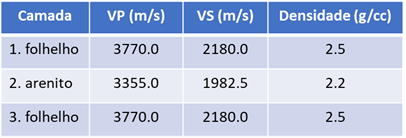
Tabela 1: propriedades elásticas do modelo da Figura 1 considerando o caso de todas as formações estarem saturadas com salmoura.

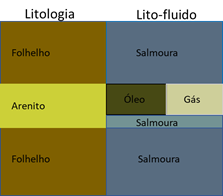
Figura 1: Representação esquemática do modelo hipotético de três camadas. Do lado esquerdo, estão representadas a litologia de cada camada (arenito e folhelho) e, do lado direito, as possíveis configurações de conteúdo fluido. No caso do folhelho o fluido será sempre salmoura (não há troca de fluido). No caso do arenito haverá a parte inferior será preenchida pelo aquifero e a superior pode ser preenchida por um tipo de hidro carboneto (óleo ou gás)

Para executar a modelagem sintética do sismograma referente ao modelo acima, podemos utilizar o código fornecido juntamente com o primeiro artigo listado acima. Quando o reservatório todo está preenchido por salmoura a modelagem do sismograma PP (onda compressional refletida). Primeiro é preciso importar algumas funcões do Python e do programa fornecido no artigo

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('.'))
from math import exp
import numpy as np
from numpy import sqrt, dot
import model_avo as mod         # funções do artigo

Carregando o modelo do reservatório em listas separadas para vp, vs e densidade. Repare que os dois valores centrais correspondem aos níveis do reservatório com fluidos diferentes, que nesse caso ainda estão os dois preenchidos com salmoura. Na substituição de fluido o níve superior será alterado para óleo ou gás.

A lista z_int fornece as profundidades das interfaces topo do reservatório, contato do fluido e base do reservatório, respectivamente.



Starting synthetic calcuations...

Calculated angle 0
Calculated angle 1
Calculated angle 2
Calculated angle 3
Calculated angle 4
Calculated angle 5
Calculated angle 6
Calculated angle 7
Calculated angle 8
Calculated angle 9
Calculated angle 10
Calculated angle 11
Calculated angle 12
Calculated angle 13
Calculated angle 14
Calculated angle 15
Calculated angle 16
Calculated angle 17
Calculated angle 18
Calculated angle 19
Calculated angle 20
Calculated angle 21
Calculated angle 22
Calculated angle 23
Calculated angle 24
Calculated angle 25
Calculated angle 26
Calculated angle 27
Calculated angle 28
Calculated angle 29
Calculated angle 30
Calculated angle 31
Calculated angle 32
Calculated angle 33
Calculated angle 34
Calculated angle 35
Calculated angle 36
Calculated angle 37
Calculated angle 38
Calculated angle 39
Calculated angle 40



  Method       NI         GRAD
---------------------------------
 Zoeppritz   -0.12029     0.12960
 Convolved  -0.12026     0.12956


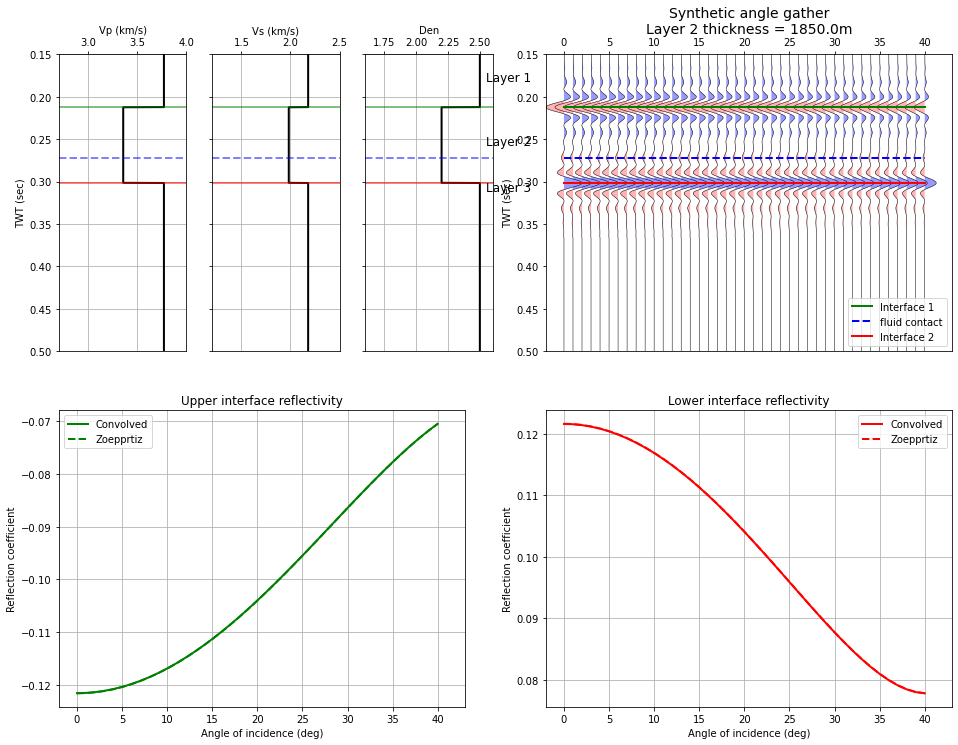

In [3]:
vp_mod = [3770.0, 3355.00, 3355.00, 3770.0]  # P-wave velocity (m/s)
vs_mod = [2180.0, 1982.50, 1982.50, 2180.0]  # S-wave velocity (m/s)
rho_mod= [2.50, 2.20, 2.20, 2.50]         # Density (g/cc)
z_int = [800.0, 900.0, 950.0]      # layer depth to interfaces target layer 2 (reservoir with aquifer)

mod.main(vp_mod, vs_mod, rho_mod, z_int)

Figura 2:Modelagem sintética usando as equações de Zoeppritz para o coeficiente de reflexão da onda P. Nos gráficos da parte superior da figura, temos os modelos de VP, VS e densidade utilizado na modelagem e o sismograma resultante, calculado para os ângulos de incidência de 0-40 graus. Na parte inferior temos as anomalias de AVO para o topo e a base do reservatório. A linha tracejada é o coeficiente de reflexão como dado pela equação de Zoeppritz, e a linha cheia mostra as amplitudes retiradas dos traços no sismograma ao longo das linhas verde e vermelha, como resultado da convolução com uma wavelet do tipo Ricker (fase 0 e freq 30 Hz)

A sua tarefa será produzir um estudo de sensibilidade simulando os sismogramas calculados para o reservatório preenchido por hidrocarboneto em sua parte superior (acima do contato de fluido). Deverão ser considerados os dois casos óleo e gás. 

Serão necessários dois passos em cada caso. Primeiro realiza o calculo da técnica de substituição de fluido para simular as propriedades elasticas com um fluido diferente. A tabela acima mostra as propriedades do reservatório saturado com salmoura, mas o programa fornecido no artigo listado no item 2 acima fornece um programa para efetuar a substituição de fluido, que foi originalmente escrito em Matlab (convertido para Python).

## Substituição de fluido

O passo a passo da substituição de fluido é fornecido no tutorial 2, listado acima. Esta operação consiste em tomar valores das propriedades elásticas de uma rocha saturada com um fluido conhecido (fluido 1) e simular os valores que seriam obtidos se a rocha fosse saturada com outro  fluido conhecido (fluido 2). Então vamos ativar o código fornecido nas celulas abaixo. 

Num primeiro estágio busca-se obter as propriedades elássticas do fluido que são a incompressibilidade (nulk modulus) e a densidade, considerando que fluidos não viscosos não suportam cisalhamento.

O reservatório está confinado em uma determinada profundidade e condições geológicas e de confinamento que fornecem as seguintes propriedades consideradas no processo de substituição de fluido, segundo Kumar (2006):

oAPI = 42  # gravidade do óleo (grau API)<br/>
GOR = 160.0  # razão gás-óleo (L/L)<br/>
gAPI = 0.9  # gravidade do gás (grau API)<br/>
T = 150.00  # Temperatura (0 C)<br/>
P = 3200.00  # Pressão (psi)<br/>
S = 3800  # salinidade da água (ppm)

O programa pode ser executado simplesmente informando o todos os valores acima que já estão carregados. Mas antes é preciso carregar alguns módulos do Python.

O programa pode ser executado simplesmente informando o todos os valores acima que já estão carregados. Mas antes é preciso carregar alguns módulos do Python.

In [4]:
from kumar3 import matrixMix, fluidProp, fluidMix

Além das propriedades acima, a rocha reservatório inicialmente saturada com salmoura tem as seguintes propriedades. Observe que é necessário apenas selecionar o fluido de saída e as saturações iniciais e finais de salmoura (água), 1.0 e 0.0 respectivamente.

In [5]:
phi = 0.20  # porosity (in fraction)
vsh = 0.20 # Vsh (volume shale in fraction)
tsw = 0.0  # target output water saturation (in fraction).
vp = 3.3550 # km/s - rock velocity from log (initial value)
vs = 1.9825 # km/s - rock velocity from log (initial value)
rho = 2.20  # gm/c - from log (initial value)
tsh = 1-tsw  # final hydrocarbon saturation

Como a rocha reservatório é um material composto, simplificadamente envolvendo uma matriz mineral, poros e fluido, tutorial apresenta no seu passo a passo, regras para o cálculo das propriedades da mistura mineral e do fluido. Nesta implementação o fluido inicial é sempre 100 % salmoura (fluido 1) e o fluido de saida pode ser uma mistura de salmoura e óleo (fluido 2) ou salmoura e gás (fluido 3).  

In [6]:
k_matrix, rho_matrix = matrixMix(vsh)    # imcompressibilidade e densidade da mistura mineral
[[k_fl1, rho_fl1], [k_fl2, rho_fl2], [k_fl3, rho_fl3]] = fluidMix(tsw,tsh) 

Os valores iniciais de vp, vs e densidade são usados para o cálculo da imcompressibilidade e do módulo de cisalhamento da rocha saturada, lembrando que aqui a saturação inicial é 100 % salmoura.

In [7]:
k_sat = rho*(vp*vp-vs*vs*4/3)  # incompressibilidade da rocha saturada  (GPa) 
g = rho*vs*vs  # módulo de cisalhamento GPa 

Com os cálculos acima dos módulos da rocha saturada com salmoura (fluido 1), as propriedades do fluido 1 e da matriz, a equação de Gassmann abaixo permite calcular o módulo da rocha sem fluido ou do arcabouço da rocha (k_frame).

In [8]:
k1 = k_sat*(phi*k_matrix/k_fl1+1-phi)-k_matrix
k2 = phi*k_matrix/k_fl1+k_sat/k_matrix-1-phi
k_frame = k1/k2  # incompressibilidade da rocha sem fluido GPa

Sua tarefa agora é completar as fórmulas para rho_sat e k_sat, com o fluido adequado para fazer a substituição de fluido em cada caso abaixo (reservatório com óleo e gás). Logo após o cálculo das novas velocidades basta executar a célula de modelagem. Você deverá entregar o notebook com os seus comentários sobre os resultados conforme indicados nas celulas de texto.

## Caso 1: reservatório de óleo

#### Para completar e comentar:

Depois de completar as equações para rho_sat e k_sat_new, explique, na célula seguinte, o conteúdo da célula de código abaixo dela.

#### Comente aqui:
Neste trabalho, consideramos um modelo de três camadas onde o folhelho está preenchido pelo fluido salmoura e o arenito está preenchido de 3 formas: o caso inicial, completamente preenchido por salmoura; o caso 1, com a parte superior do reservatório sendo preenchido por óleo, e a região inferior com salmoura; e o caso 2, com a substituição de óleo por gás.

As velocidades de propagação das ondas sísmicas nas rochas dependem das propriedades elásticas dos elementos que estão presentes na constituição mineralógica, dos planos de faturamento e da estrutura de cristalização dos minerais. Nas rochas sedimentares, a porosidade e os materiais que se encontram no interior dos poros da rocha são fundamentais.

A nova densidade e incompressibilidade foram calculadas pelas equações abaixo, retiradas das notas de aula e do artigo "A Tutorial os Gassmann Fluid Substitution: Formulation, Algorithm and Mathlab Code".

$$ \rho_{b, fl2} = \rho_{b, fl1} + (\rho_{fl2} - \rho_{fl1})\phi$$

$$
K_{sat new}= K_{frame} + \frac{(1-\frac{K_{frame}}{K_{matriz}})^2}
{\frac{\phi}{K_{fl2}} + \frac{(1-\phi)}{K_{matriz}}+\frac{K_{frame}}{K_{matriz}^2}}
$$

Os valores encontrados para Vp, Vs e densidade podem ser vistos na tabela abaixo.

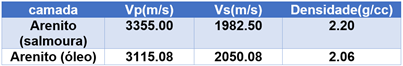

Como pode ser observado nos valores printados, no caso do óleo, a velocidade da onda p diminui, e a velocidade da onda s aumenta com a substituição da salmoura pelo óleo. Isso ocorre pela mudança de densidade e incompressibilidade e, como consequência, nas propriedades elásticas do meio. A velocidade da onda s é dada pela equação:

$$V_s = \sqrt{\frac{\mu}{\rho}} $$

Como pode-se observar, com a redução da densidade, a velocidade da onda s irá aumentar visto que são inversamente proporcionais.

Já para a velocidade da onda p, a sua redução com a substituição pode ser explicada pela redução da incompressibilidade (k_sat=13,23 para k_sat_new=8,42). A equação para a velocidade da onda p é dada por:


$$V_p = \sqrt{\frac{K+4/3\mu}{\rho}} $$


In [9]:
#### Complete aqui as formulas para rho_sat e k_sat_new
rho_sat = rho+(rho_fl2-rho_fl1)*phi
#
# Step 9: Gassmann Saturated bulk modulus (equation 3)
#

k_sat_new = k_frame+(1-k_frame/k_matrix)**2/(phi/k_fl2+(1-phi)/k_matrix-k_frame/k_matrix**2) 
#
# Step 10: Compute seismic velocity after fluid substitution (equations 1 and 2) and output velocities in m/s
#
vp_sat = sqrt((k_sat_new+g*4/3)/rho_sat) * 1000. # m/s (OUTPUT)
vs_sat = sqrt(g/rho_sat) * 1000.                # m/s (OUTPUT)
print("Elastic properties of reservoir fluids")
print("Brine (original): VP = %5.2f (m/s), VS = %5.2f (m/s), Density = % 4.2f (g/cc)" %(vp*1000, vs*1000, rho))
print("Oil (fluid subs): VP = %5.2f (m/s), VS = %5.2f (m/s), Density = % 4.2f (g/cc)" %(vp_sat, vs_sat, rho_sat))


Elastic properties of reservoir fluids
Brine (original): VP = 3355.00 (m/s), VS = 1982.50 (m/s), Density =  2.20 (g/cc)
Oil (fluid subs): VP = 3115.08 (m/s), VS = 2050.08 (m/s), Density =  2.06 (g/cc)


Agora é só executar novamente a modelagem após a substituição dos valores para criar a camada de óleo na parte superior do reservatório.



Starting synthetic calcuations...

Calculated angle 0
Calculated angle 1
Calculated angle 2
Calculated angle 3
Calculated angle 4
Calculated angle 5
Calculated angle 6
Calculated angle 7
Calculated angle 8
Calculated angle 9
Calculated angle 10
Calculated angle 11
Calculated angle 12
Calculated angle 13
Calculated angle 14
Calculated angle 15
Calculated angle 16
Calculated angle 17
Calculated angle 18
Calculated angle 19
Calculated angle 20
Calculated angle 21
Calculated angle 22
Calculated angle 23
Calculated angle 24
Calculated angle 25
Calculated angle 26
Calculated angle 27
Calculated angle 28
Calculated angle 29
Calculated angle 30
Calculated angle 31
Calculated angle 32
Calculated angle 33
Calculated angle 34
Calculated angle 35
Calculated angle 36
Calculated angle 37
Calculated angle 38
Calculated angle 39
Calculated angle 40



  Method       NI         GRAD
---------------------------------
 Zoeppritz   -0.18873     0.09806
 Convolved  -0.18868     0.09804


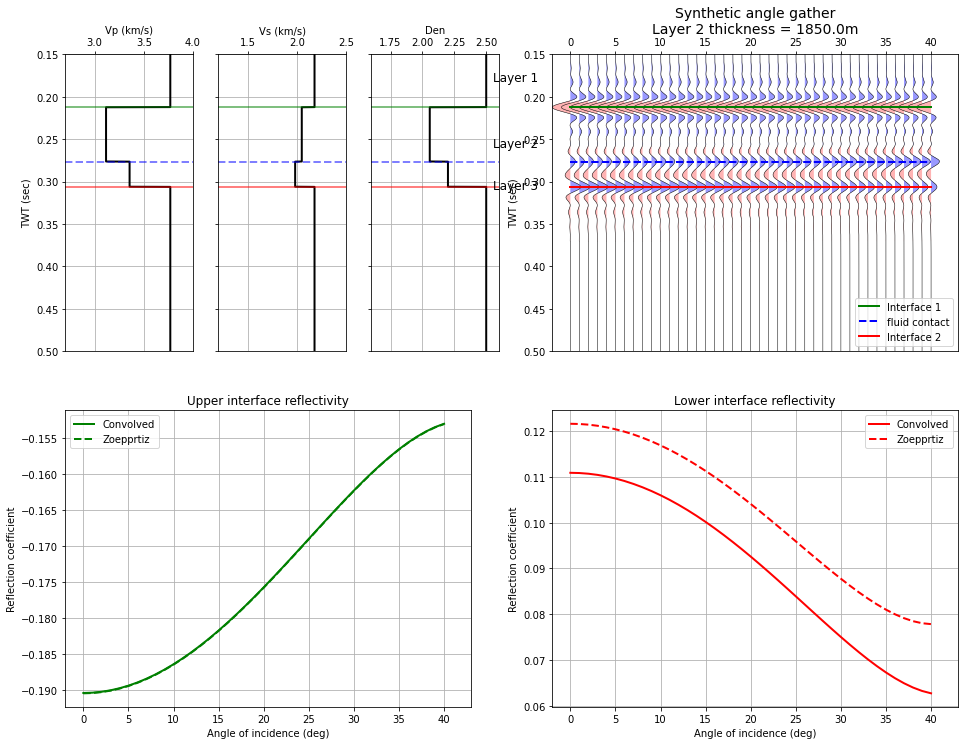

In [10]:
vp_mod[1]= vp_sat
vs_mod[1]= vs_sat
rho_mod[1]= rho_sat
mod.main(vp_mod, vs_mod, rho_mod, z_int)

## Caso 2: reservatório com gás

#### Para completar e comentar:

Como no caso anterior, depois de completar as equações para rho_sat e k_sat_new, comemnte sobre as mudanças para este caso e ue o conteúdo das próximas células de cálculo.

#### Comente aqui:

De forma análoga ao caso com o reservatório de óleo, a substituição por gás apresentará redução da velocidade da onda p e aumento da onda s. Apesar disso, como a densidade do gás é menor que a da salmoura e do óleo, uma redução maior é observada para Vp e um aumento mais considerável para Vs. Na tabela abaixo fica evidente a comparação das propriedades em relação ao reservatório com salmoura, óleo e gás.

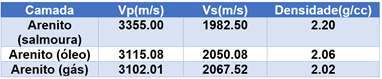

In [16]:
#### Complete aqui as formulas para rho_sat e k_sat_new

rho_sat = rho+(rho_fl3-rho_fl1)*phi

#
# Step 9: Gassmann Saturated bulk modulus (equation 3)
#

k_sat_new = k_frame+(1-k_frame/k_matrix)**2/(phi/k_fl3+(1-phi)/k_matrix-k_frame/k_matrix**2)
#
# Step 10: Compute seismic velocity after fluid substitution (equations 1 and 2) and output velocities in m/s
#
vp_sat = sqrt((k_sat_new+g*4/3)/rho_sat) * 1000. # m/s (OUTPUT)
vs_sat = sqrt(g/rho_sat) * 1000.                # m/s (OUTPUT)
print("Elastic properties of reservoir fluids")
print("Brine (original): VP = %5.2f (m/s), VS = %5.2f (m/s), Density = % 4.2f (g/cc)" %(vp*1000, vs*1000, rho))
print("Gas (fluid subs): VP = %5.2f (m/s), VS = %5.2f (m/s), Density = % 4.2f (g/cc)" %(vp_sat, vs_sat, rho_sat))


Elastic properties of reservoir fluids
Brine (original): VP = 3355.00 (m/s), VS = 1982.50 (m/s), Density =  2.20 (g/cc)
Gas (fluid subs): VP = 3102.01 (m/s), VS = 2067.52 (m/s), Density =  2.02 (g/cc)


Agora é só executar novamente a modelagem após a substituição dos valores para criar a camada de gás na parte superior do reservatório.



Starting synthetic calcuations...

Calculated angle 0
Calculated angle 1
Calculated angle 2
Calculated angle 3
Calculated angle 4
Calculated angle 5
Calculated angle 6
Calculated angle 7
Calculated angle 8
Calculated angle 9
Calculated angle 10
Calculated angle 11
Calculated angle 12
Calculated angle 13
Calculated angle 14
Calculated angle 15
Calculated angle 16
Calculated angle 17
Calculated angle 18
Calculated angle 19
Calculated angle 20
Calculated angle 21
Calculated angle 22
Calculated angle 23
Calculated angle 24
Calculated angle 25
Calculated angle 26
Calculated angle 27
Calculated angle 28
Calculated angle 29
Calculated angle 30
Calculated angle 31
Calculated angle 32
Calculated angle 33
Calculated angle 34
Calculated angle 35
Calculated angle 36
Calculated angle 37
Calculated angle 38
Calculated angle 39
Calculated angle 40



  Method       NI         GRAD
---------------------------------
 Zoeppritz   -0.19889     0.09729
 Convolved  -0.19884     0.09727


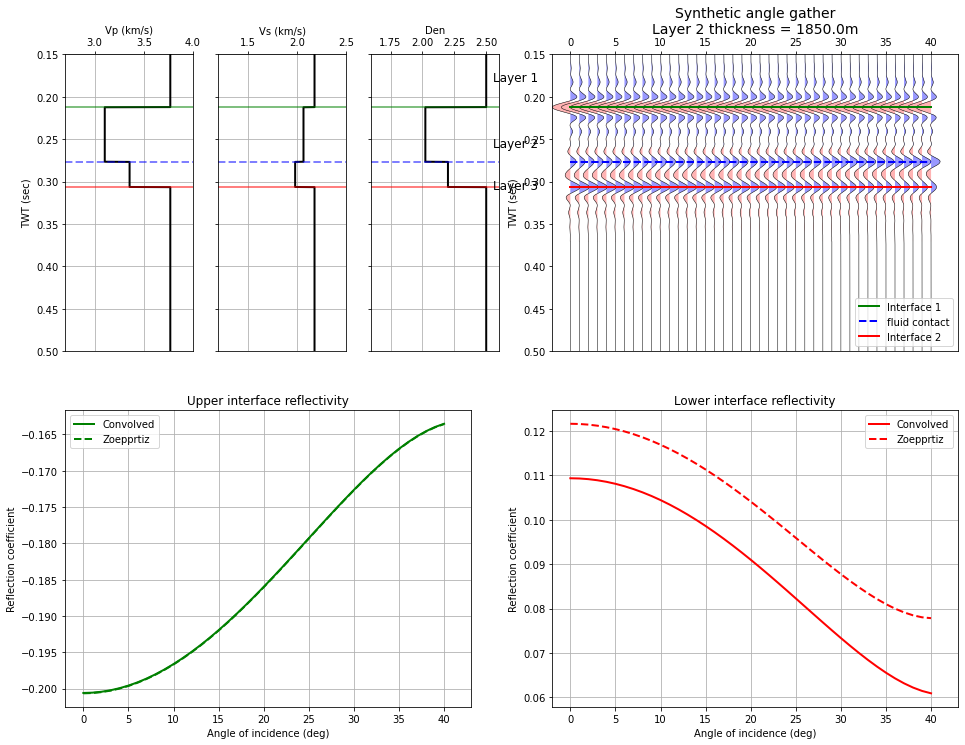

In [17]:
vp_mod[1]= vp_sat
vs_mod[1]= vs_sat
rho_mod[1]= rho_sat
mod.main(vp_mod, vs_mod, rho_mod, z_int)

#### Questionário:

Aqui na célula seguinte, comente sobre as diferenças que você notou nas anomalias de avo referentes ao topo e à base do reservatório. Observe as mudanças em relação aos casos anteriores (salmoura, óleo e gás).  De que tipo são essas anomalias? Repare que entre os valores informados na saída da modelagem estão uma pequena tabela com as informações dos parâmetros da formula linearizada de AVO com dois parâmetros usados para determinar o tipo de anomalia Intercepto  (NI) e gradiente (GRAD). Com eles você pode ver a que categoria pertence tais curvas de AVO.

Outra abordagem seria tentar explicar as anomalias em termos dos contrastes entre as propriedades elásticas. Desta perpectiva como podemos explicar as anomalias? 

Por que as anomalia da base do reservatório (linha contínua vermelha) se diferencia do coeficiente de reflexão (linha vermelha tracejada)? Repare que a mesma coisa não contece no topo do reservatório (linhas verdes).

#### Responda aqui:

A tabela abaixo apresenta os dados encontrados de Intercepto (NI) e gradiente (GRAD) calculados utilizando as equações de Zoeppritz e o sintético convolvido. Como o gradiente (GRAD) é negativo e o Intercepto (NI) é positivo, a curva é classificada como tipo IV.

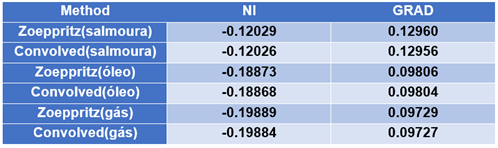

Como podemos observar, quando a parte superior do arenito está preenchida por óleo ou gás, há uma diferença entre os dados obtidos para os dados Intercepto (NI) e gradiente (GRAD) calculados usando as equações de Zoeppritz e o sintético convolvido. Quando está preenchido apenas por salmoura, os valores são muito próximos.

No caso 1 e 2, com reservatório preenchido por óleo e gás, fica evidente uma anomalia próxima à base do reservatório e, consequentemente, uma discrepância entre os valores de coeficientes de reflexão por convolução e calculados pela equação de Zoeppritz (as curvas em vermelho contínua e pontilhadas se diferem). A espessura da camada do folhelho inferior não é tão pequena quanto a observada na simulação onde z=15 metros, mas também não é tão grande a ponto de não existir nenhuma interferência de sinal.

Outra maneira de classificar a AVO é através das anomalias em termos dos contrastes entre as propriedades elásticas. Dessa maneira, a linha azul apresenta um contraste positivo, indicando a presença de hidrocarbonetos em contato com a água. O contraste negativo, na linha verde deixa a anomalia bastante evidente por conta do intercepto negativo, exibindo uma amplitude máxima entre 35 e 40 graus. A parte superior da segunda camada apresenta um contraste positivo na linha azul e abaixo da linha verde exibindo a presença de óleo ou gás. Na linha vermelha apresenta amplitude máxima entre 0 e 5 graus e um contraste positivo por conta do intercepto positivo.

Dessa maneira, baseado nas respostas da AVO, segundo o modelo proposto por Castagna e Swan (1997), essas anomalias são do tipo IV,  pois no topo do reservatório possui uma anomalia negativa (intercept negativo) que está tendendo à zero, com um gradiente positivo, sendo observado pelo decaimento da amplitude no sismograma com o ângulo de incidência. 

A anomalia de Classe IV é uma subdivisão da Classe III. A classe IV está intimamente relacionada à presença de hidrocarbonetos, apresentando uma velocidade inferior a rocha sobreposta, e dessa forma, uma diminuição da amplitude com o afastamento é observada. As classificações dos modleos podem ser vistos abaixo:

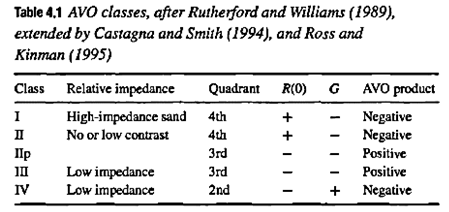

Já para a base do reservatório, anomalias positivas (intercept positivo) podem ser observadas, com gradiente negativo, sendo classificadas como anomalias AVO de classe I.


Para reforçar sua resposta do último ponto, considerando este mesmo caso do reservatório com gás, execute uma modelagem adicional, simulando a condição em que o gás contido no reservatório tenha sido produzido. Neste caso a espessura da camanda de gás teria sido reduzida a somente 15 m. Como as curvas de AVO se modificam com esta alteração? (Dica: Na célula abaixo, execute novamente a modelagem modificando apenas o elemento z_int[1] para ajustar o modelo para a nova espessura da camada de gás.)



Starting synthetic calcuations...

Calculated angle 0
Calculated angle 1
Calculated angle 2
Calculated angle 3
Calculated angle 4
Calculated angle 5
Calculated angle 6
Calculated angle 7
Calculated angle 8
Calculated angle 9
Calculated angle 10
Calculated angle 11
Calculated angle 12
Calculated angle 13
Calculated angle 14
Calculated angle 15
Calculated angle 16
Calculated angle 17
Calculated angle 18
Calculated angle 19
Calculated angle 20
Calculated angle 21
Calculated angle 22
Calculated angle 23
Calculated angle 24
Calculated angle 25
Calculated angle 26
Calculated angle 27
Calculated angle 28
Calculated angle 29
Calculated angle 30
Calculated angle 31
Calculated angle 32
Calculated angle 33
Calculated angle 34
Calculated angle 35
Calculated angle 36
Calculated angle 37
Calculated angle 38
Calculated angle 39
Calculated angle 40



  Method       NI         GRAD
---------------------------------
 Zoeppritz   -0.18873     0.09806
 Convolved  -0.20591     0.08203


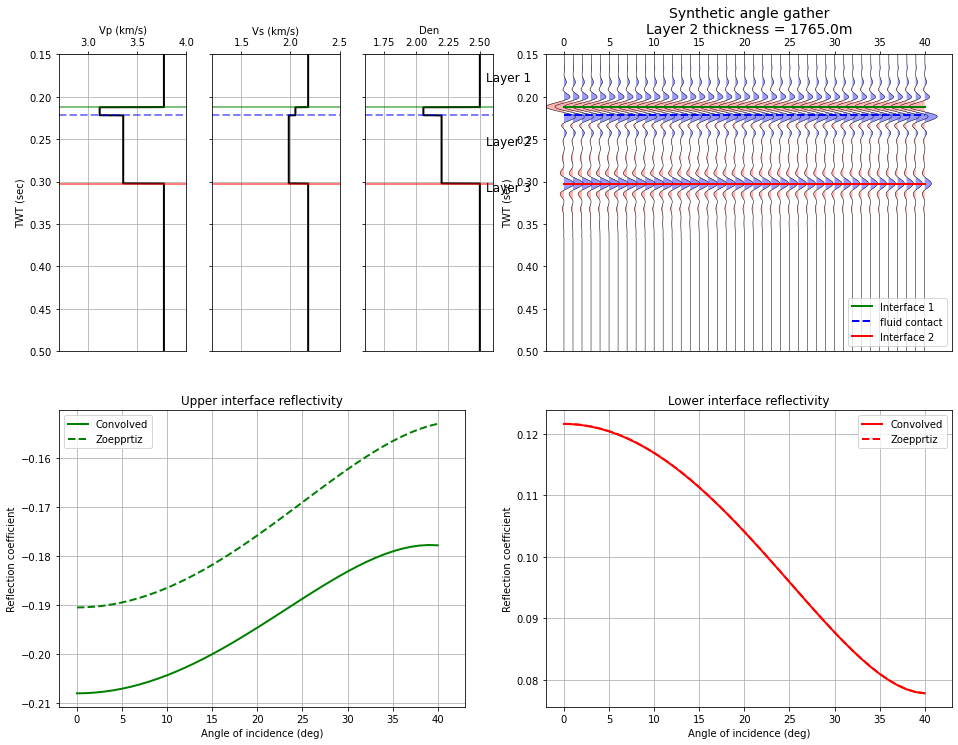

In [12]:
#### Isira aqui o codigo da nova chamada da modelagem, com a alteração de z_int[1]
z_int[1]=815
vp_mod[1]= vp_sat
vs_mod[1]= vs_sat
rho_mod[1]= rho_sat
mod.main(vp_mod, vs_mod, rho_mod, z_int)


#### Explique aqui as mudanças nos resultados desta nova modelagem;

Com a mudança da espesura da camada de gás para 15 metros, o efeito tuning pode ser observado. Esse efeito acontece pela reflexão de uma onda em interfaces próximas (topo e base do reservatório de gás), de modo que caso as reflexões ascendentes se sobreponham, interferência e alteração na resposta de amplitude pode acontecer. Assim, como essa anomalia está localizada próxima ao topo do reservatório de arenito, as curvas de topo apresentarão uma discrepância entre os valores para os coeficientes de reflexão por convolução e por Zoeppritz, enquanto as de base se sobrepuseram.

As refletividades exatas de Zoeppritz são maiores do que as amplitudes convoluídas, o que de acordo com o artigo "Thin beds, tuning, and AVO" representa uma interferência destrutiva.